**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy.linalg as LA
from mpl_toolkits.mplot3d import Axes3D

**Reading df from csv files**

In [ ]:
col = ['x1' , 'x2' , 'y']
df = pd.read_csv('Assignment4Dataset.csv' ,names=col, header=None)
df.head()

,x1,x2,y
0,1.140,-0.114,-1
1,-1.520,-1.150,1
2,-1.050,0.720,-1
3,-0.916,0.397,1
4,-1.090,0.437,1


**Plotting given df**

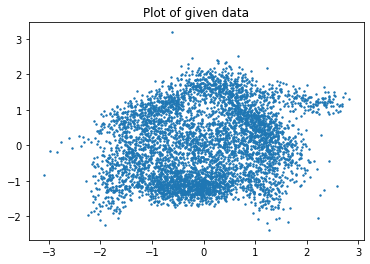

In [ ]:
plt.title("Plot of given data")
plt.scatter(x=df['x1'] , y=df['x2'] , s=2)
plt.show()

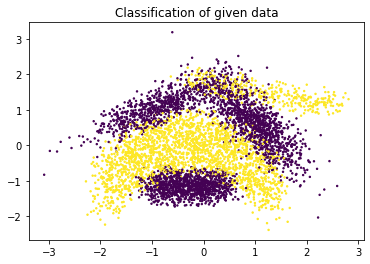

In [ ]:
plt.title("Classification of given data")
plt.scatter(x=df['x1'] , y=df['x2'] , c=df['y'] , s=2)
plt.show()


Not possible to have a separating hyperplane, thus required to increase the no. of features

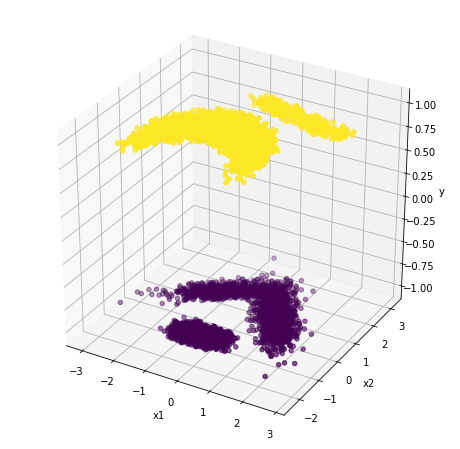

In [ ]:
x1 = df['x1'].tolist()
x2 = df['x2'].tolist()
y = df['y'].tolist()
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(x1 , x2 , y , c=y , marker='o')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
plt.show()

Possible to have a separating hyperplane in higher dimension

**Increasing no. of features**

In [ ]:
df['x3'] = df['x1']**2
df['x4'] = df['x2']**2
df['x5'] = df['x1'] * df['x2']
df['x6'] = (df['x1']**2) + (df['x2']**2)
df['x7'] = (df['x1']**2) * (df['x2']**2)
df['x8'] = ((df['x1']+1)**2) * ((df['x2']+1)**2)
print(df.head())

      x1     x2  y        x3        x4        x5        x6        x7        x8
0  1.140 -0.114 -1  1.299600  0.012996 -0.129960  1.312596  0.016890  3.594968
1 -1.520 -1.150  1  2.310400  1.322500  1.748000  3.632900  3.055504  0.006084
2 -1.050  0.720 -1  1.102500  0.518400 -0.756000  1.620900  0.571536  0.007396
3 -0.916  0.397  1  0.839056  0.157609 -0.363652  0.996665  0.132243  0.013771
4 -1.090  0.437  1  1.188100  0.190969 -0.476330  1.379069  0.226890  0.016726


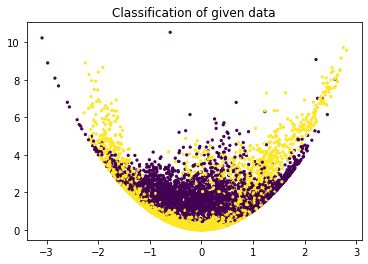

In [ ]:
plt.title("Classification of given data")
plt.scatter(x=df['x1'] , y=df['x6'] , c=df['y'] , s=5)
plt.show()

**Dividing data into training & test data**

In [ ]:
train_data = df.iloc[:400]
X_train = train_data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y_train = train_data["y"]

test_data = df.iloc[400:]
X_test = test_data[["x1","x2","x3","x4","x5","x6","x7","x8"]]
Y_test = test_data["y"]

**Loss function**

In [ ]:
def calc_loss(w , lmbd , kappa):
  phi_x = np.array(X_train.values)
  n = len(X_train)
  arr = np.random.choice(range(n) , kappa , replace=False)
  loss = 0
  grad = 0
  for i in arr:
    Y_pred = np.dot(phi_x[i] , w)
    loss += (Y_train[i] - Y_pred)**2 / (2*n)
    grad += (Y_train[i] - Y_pred)*(-phi_x[i])/n

  loss += (lmbd/2) * np.dot(w,w)
  grad+= lmbd * w

  print(loss)
  print(grad)
  return loss , grad

**Gradient descent function**

In [ ]:
def grad_desc(lmbd , learning_rate , kappa):
  w = np.ones(len(X_train.values[0]))
  loss_arr = []
  grad_arr = []
  min_loss = math.inf
  epsilon = 1e-07 
  epoch = 1  
  w_opt = 0
  grad_opt = 0
  loss , grad = calc_loss(w , lmbd , kappa)

  while(LA.norm(grad) > epsilon and epoch < 500):
    loss , grad = calc_loss(w , lmbd , kappa)
    loss_arr.append(loss)
    grad_arr.append(LA.norm(grad))
    learning_rate = learning_rate / (lmbd+epoch)
    w = w - learning_rate*grad

    if(min_loss > loss):
      min_loss = loss
      w_opt = w
      grad_opt = grad

    epoch+=1

  return min_loss , w_opt , grad_opt , loss_arr , grad_arr


In [ ]:
result = []
result.append(grad_desc(1.5 , 1 , len(X_train))) #steepest descent method
result.append(grad_desc(1.5 , 1 , 30))           #mini-batch
result.append(grad_desc(1.5 , 1 , 1))            #stochastic gradient

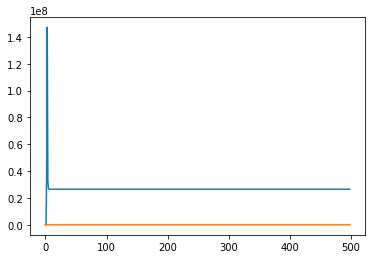

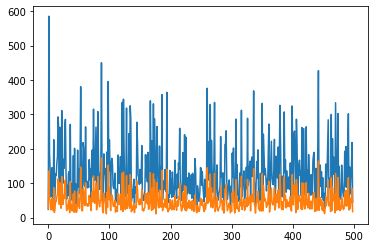

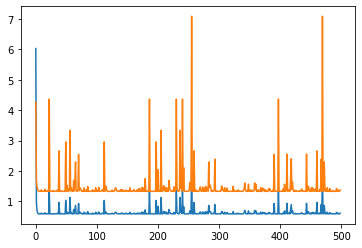

In [ ]:
for i in range(3):
    plt.plot(result[i][3])
    plt.plot(result[i][4])
    plt.show()

In [ ]:
for i in range(3):
    print(result[i][0])
print("*******************")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def evaluate(wkfinal):
    def fit_testdata():
        ypred=np.zeros(len(X_test))

        for i in range(len(X_test)):
            ypred[i]=np.sign(np.dot(wkfinal,X_test.values[i]))
        return ypred

    ypred=fit_testdata()


    print(accuracy_score(Y_test,ypred))
    print(confusion_matrix(Y_test, ypred))


    #print(wkfinal)
    def fit_traindata():
        ypred=np.zeros(len(X_train))
        for i in range(len(X_train)):
            ypred[i]=np.sign(np.dot(wkfinal,X_train.values[i]))
        return ypred

    ypred=fit_traindata()
    print(accuracy_score(Y_train,ypred))
    print(confusion_matrix(Y_train, ypred))
    
    print("________________________________________________________________________________________________")
evaluate(result[0][1])
evaluate(result[1][1])
evaluate(result[2][1])

143.90057597227704
23.77213538607567
0.5918771999521193
*******************
0.5508163265306123
[[2699    0]
 [2201    0]]
0.5625
[[225   0]
 [175   0]]
________________________________________________________________________________________________
0.5508163265306123
[[2699    0]
 [2201    0]]
0.5625
[[225   0]
 [175   0]]
________________________________________________________________________________________________
0.44918367346938776
[[   0 2699]
 [   0 2201]]
0.4375
[[  0 225]
 [  0 175]]
________________________________________________________________________________________________
